In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.datasets import make_moons
from scipy.cluster.hierarchy import dendrogram
from IPython.core.display import Image

In [20]:
# let's cluster on land use: dev, forest, pasture, crops
df = gpd.read_file("counties.geojson")
df.head()

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
0,Racine County,195408,861533739,82164,0.230906,0.100167,0.072588,0.482126,"POLYGON ((645313.81834 2212738.58489, 645456.3..."
1,Clark County,34690,3133378070,15076,0.046476,0.326691,0.022979,0.444642,"POLYGON ((431909.29098 2393751.35940, 433872.5..."
2,Wood County,74749,2054044751,34088,0.080285,0.226244,0.023411,0.320990,"POLYGON ((498653.94690 2388370.84202, 498647.3..."
3,Rusk County,14755,2366092584,8883,0.035567,0.473937,0.049572,0.138357,"POLYGON ((397166.23292 2498521.78567, 397167.7..."
4,Ozaukee County,86395,603514413,36267,0.222642,0.088609,0.127867,0.389109,"POLYGON ((654796.85595 2272096.94081, 654799.8..."


<AxesSubplot:xlabel='crops', ylabel='pasture'>

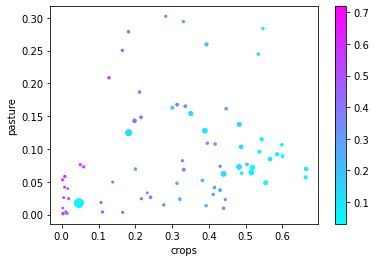

In [21]:
df.plot.scatter(x="crops", y="pasture", s=df["developed"]*100, c=df["forest"],
                cmap="cool", sharex=False)

<AxesSubplot:>

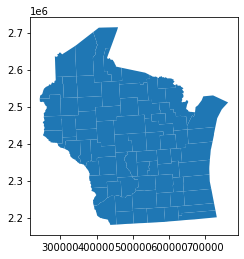

In [22]:
df.plot()

# Clustering Counties (KMeans)

In [23]:
c = KMeans(4)
c.fit(df[["developed", "forest", "pasture", "crops"]])
print(c.inertia_)
groups = c.predict(df[["developed", "forest", "pasture", "crops"]])
groups

1.2909085151228035


array([2, 3, 3, 0, 2, 3, 2, 1, 0, 3, 2, 2, 2, 0, 3, 1, 3, 3, 0, 0, 3, 0,
       3, 2, 3, 3, 3, 3, 0, 2, 2, 2, 0, 3, 3, 3, 2, 3, 0, 2, 2, 3, 3, 2,
       0, 0, 0, 2, 3, 3, 3, 2, 0, 0, 0, 2, 3, 3, 2, 2, 0, 2, 0, 0, 2, 3,
       0, 0, 3, 0, 0, 3], dtype=int32)

<AxesSubplot:>

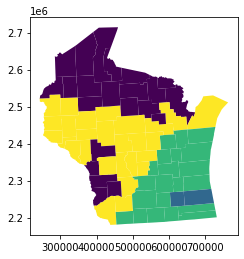

In [24]:
df.plot(column=groups)

# Clustering Counties (Agglomerative)

In [25]:
c = AgglomerativeClustering(4, compute_distances=True)
#print(c.inertia_) # we don't have inertia anymore, because we don't centroids!!!

# cannot predict on additional data after first fitting pass
#c.fit(df[["developed", "forest", "pasture", "crops"]])
#groups = c.predict(df[["developed", "forest", "pasture", "crops"]])

groups = c.fit_predict(df[["developed", "forest", "pasture", "crops"]])
groups

array([2, 1, 1, 0, 2, 0, 2, 3, 0, 1, 2, 2, 2, 0, 1, 3, 1, 1, 0, 0, 1, 0,
       0, 2, 0, 1, 1, 1, 0, 2, 2, 2, 0, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2,
       0, 0, 0, 2, 1, 1, 1, 2, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 1])

<AxesSubplot:>

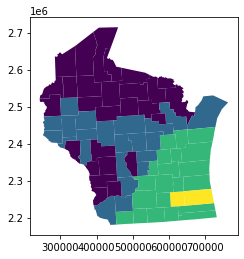

In [26]:
df.plot(column=groups)

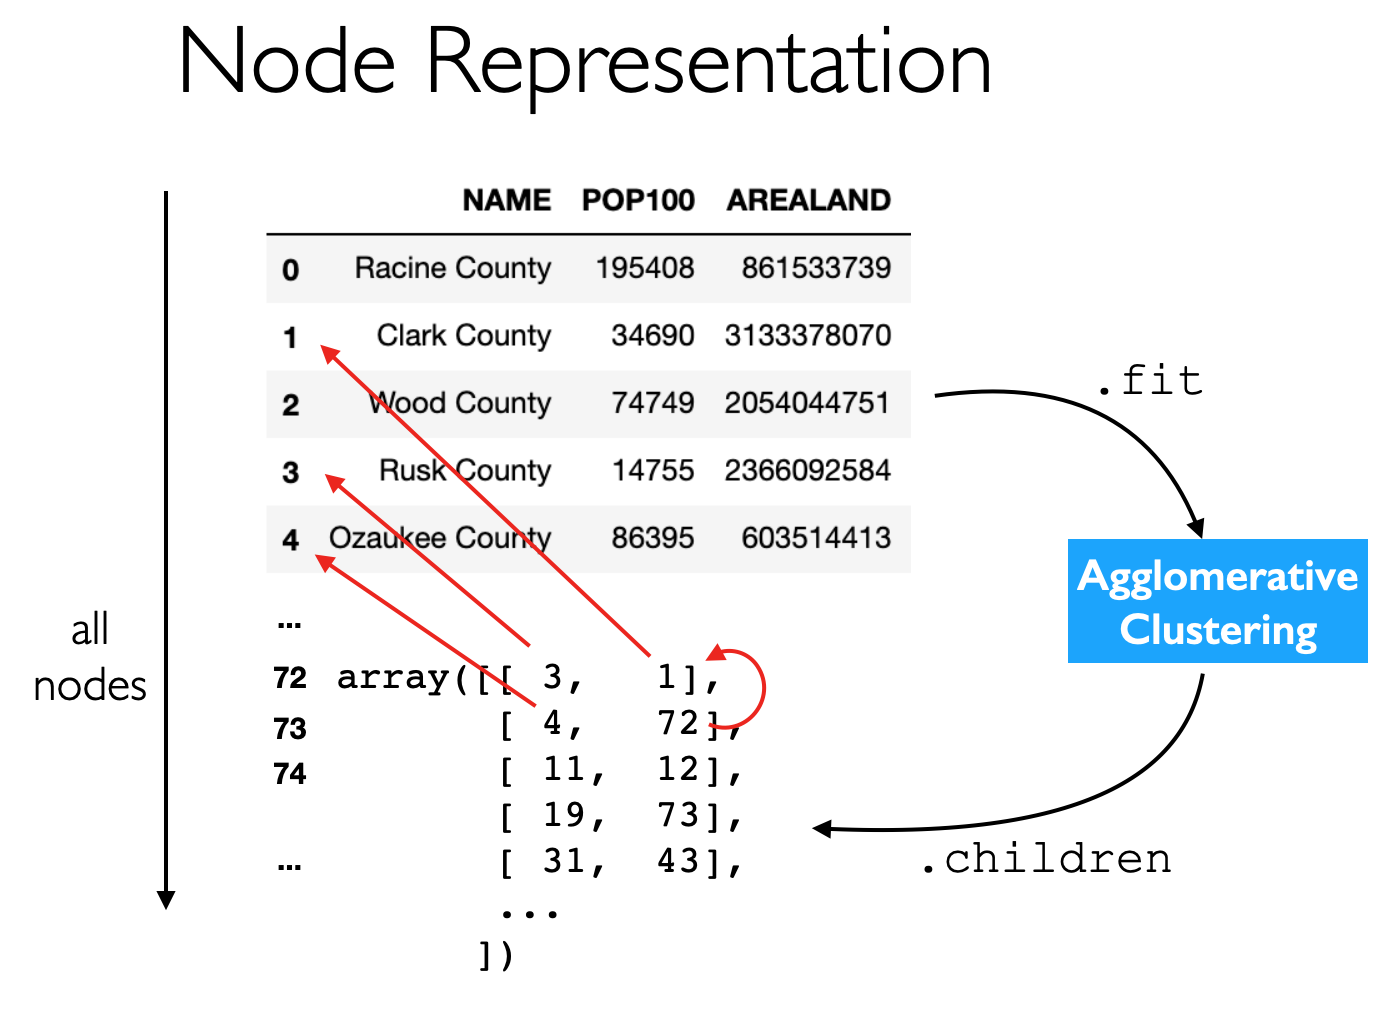

In [27]:
Image("children.png", width=500)

In [28]:
df.iloc[[44, 62]]

,NAME,POP100,AREALAND,HU100,developed,forest,pasture,crops,geometry
44,Forest County,9304,2626939844,8970,0.031107,0.534801,0.004466,0.011161,"POLYGON ((568513.86038 2567267.07976, 568511.3..."
62,Menominee County,4232,926217566,2253,0.029589,0.533466,0.001092,0.002670,"POLYGON ((551112.77265 2479206.62887, 551125.3..."


In [29]:
c.children_ # defines the tree

array([[ 44,  62],
       [ 21,  53],
       [ 11,  12],
       [ 19,  73],
       [ 31,  43],
       [ 20,  35],
       [ 58,  74],
       [  1,  27],
       [ 50,  77],
       [ 24,  68],
       [ 16,  34],
       [ 26,  57],
       [ 22,  65],
       [ 39,  47],
       [ 63,  69],
       [ 28,  38],
       [  9,  33],
       [  0,  10],
       [  2,  42],
       [  6,  64],
       [ 30,  61],
       [  3,  60],
       [ 36,  59],
       [  8,  66],
       [ 37,  88],
       [ 32,  70],
       [ 13,  54],
       [ 14,  48],
       [ 72,  87],
       [ 40,  55],
       [  4,  51],
       [ 49,  90],
       [ 45,  81],
       [ 67,  75],
       [ 29,  91],
       [ 79,  80],
       [ 23,  76],
       [ 93,  95],
       [ 98, 100],
       [ 46,  86],
       [ 41,  96],
       [ 18,  97],
       [ 25,  83],
       [ 78, 108],
       [ 94, 101],
       [ 82, 107],
       [  5,  84],
       [ 56,  71],
       [ 17, 103],
       [105, 110],
       [ 89, 106],
       [ 92, 115],
       [112,

In [30]:
c.distances_

array([0.00935791, 0.01604149, 0.02092021, 0.02151293, 0.02424828,
       0.02673536, 0.02938232, 0.03475305, 0.03788484, 0.03875477,
       0.04192914, 0.0423188 , 0.04341326, 0.04484026, 0.04513118,
       0.04576086, 0.04670009, 0.04721484, 0.04756252, 0.05167189,
       0.05353054, 0.0539879 , 0.05482542, 0.05493305, 0.05559517,
       0.06046126, 0.06075136, 0.06293962, 0.0653365 , 0.07148774,
       0.07365618, 0.07755506, 0.08184372, 0.08507794, 0.08512826,
       0.08611516, 0.0933187 , 0.10028075, 0.10776496, 0.11196954,
       0.1129952 , 0.11348526, 0.11556293, 0.11643561, 0.13029843,
       0.13278952, 0.13327272, 0.13973184, 0.14087973, 0.15764458,
       0.16143954, 0.17165262, 0.18668449, 0.20984745, 0.21490193,
       0.23884304, 0.24322474, 0.26496063, 0.26698788, 0.3141989 ,
       0.3409881 , 0.34642599, 0.34903899, 0.45786527, 0.46672959,
       0.49210299, 0.50734432, 0.71479701, 1.15428952, 1.24061603,
       2.63233914])

# Tree Recursion: Node Count

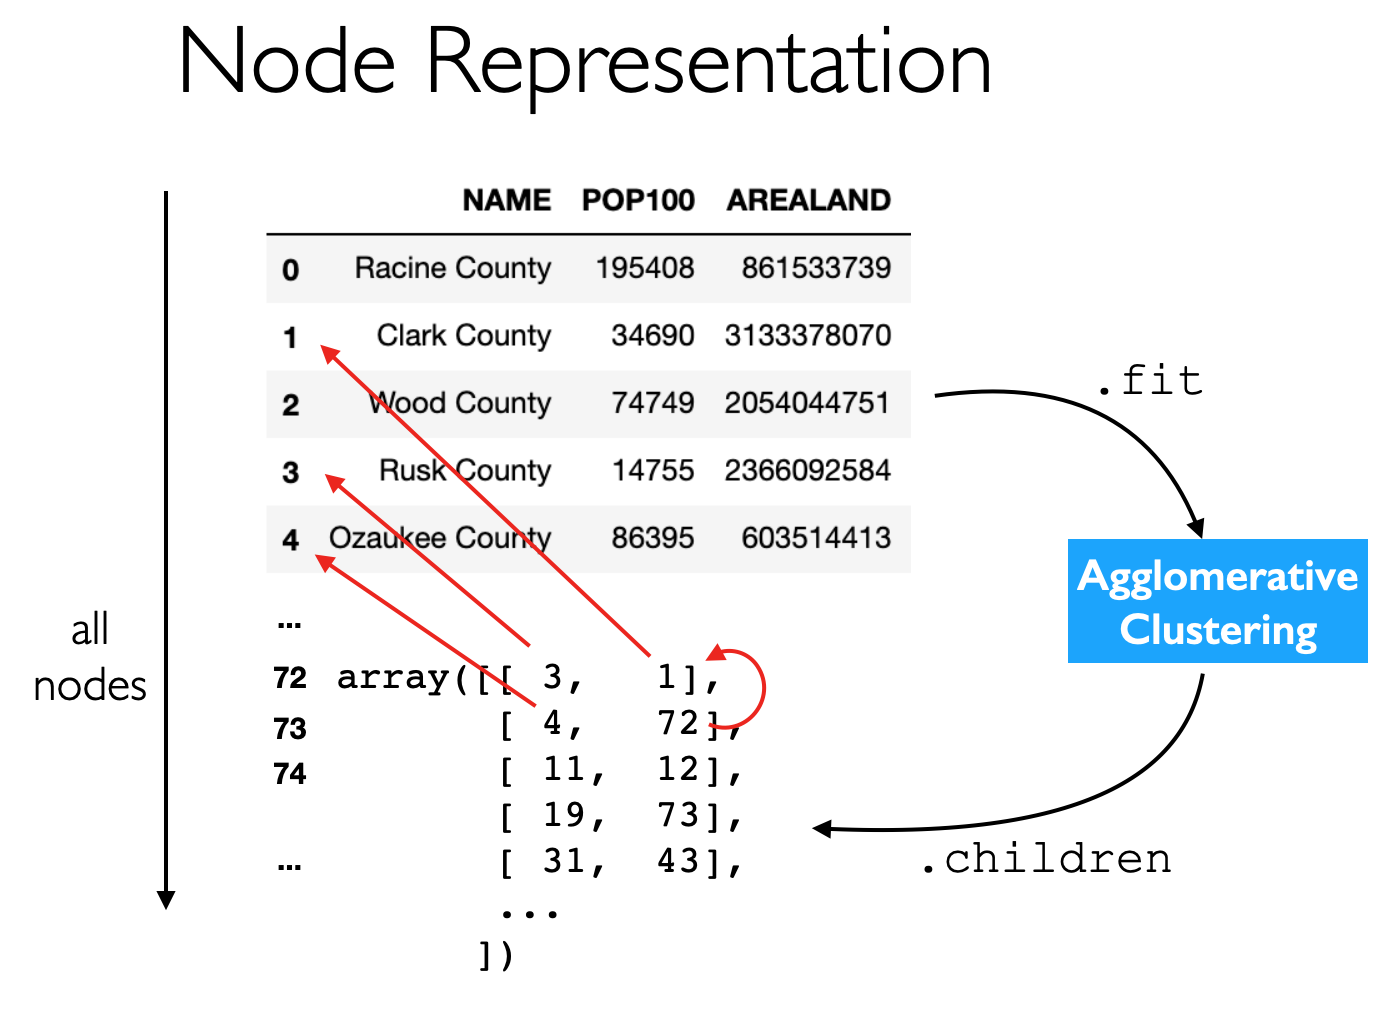

In [31]:
Image("children.png", width=500)

In [40]:
def node_count(top_node_idx):
    if top_node_idx < len(df):
        # LEAF!
        return 1
    else:
        # PARENT!
        left, right = c.children_[top_node_idx - len(df)]
        #print(left, right)
        return node_count(left) + node_count(right) + 1

node_count(75)

5

In [42]:
# for each parent, how many nodes in the subtree?
counts = np.array([node_count(len(df)+i) for i in range(len(c.children_))])
counts

array([  3,   3,   3,   5,   3,   3,   5,   3,   5,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   5,   3,
         3,   3,   7,   3,   3,   5,   5,   7,   5,   9,   5,   7,  11,
         5,   7,   5,   5,  11,   7,  13,   5,   3,   7,  19,   9,  15,
        13,  11,   7,  21,  13,  11,  21,  21,  35,  19,  19,  41,   3,
        31,  43,  53,  47,  89, 143])

# Linkage Matrix => Dendrogram

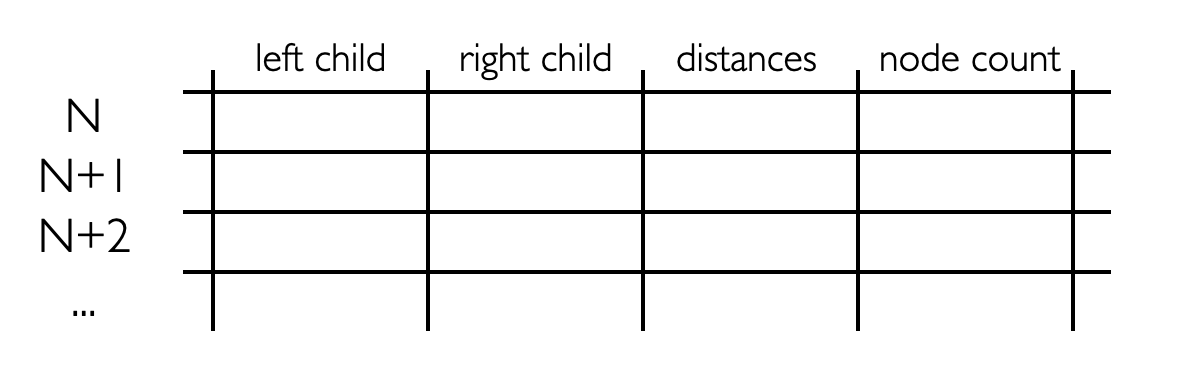

In [44]:
Image("linkage.png", width=400)

In [54]:
# linkage matrix to define the tree
Z = np.concatenate([
    c.children_,                # columns 1 and 2
    c.distances_.reshape(-1,1), # column 3
    counts.reshape(-1,1)        # column 4
], axis=1)

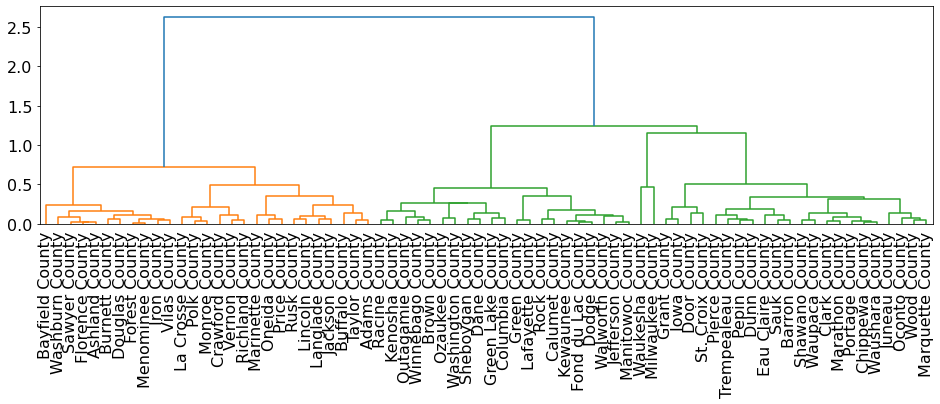

In [65]:
fig, ax = plt.subplots(figsize=(16,4))
dendrogram(Z, ax=ax, labels=df["NAME"].values)
ax.tick_params(labelsize=16)
None

# Moons

https://scikit-learn.org/stable/modules/clustering.html#different-linkage-type-ward-complete-average-and-single-linkage

<AxesSubplot:xlabel='x', ylabel='y'>

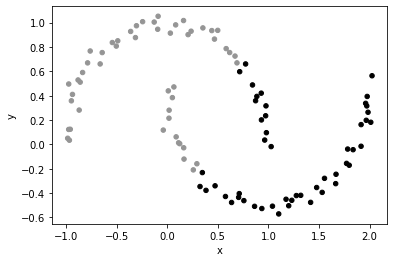

In [13]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns=["x", "y"])
df["color"] = KMeans(n_clusters=2).fit_predict(df[["x", "y"]])
df.plot.scatter(x="x", y="y", c=df["color"], vmin=-1)

<AxesSubplot:xlabel='x', ylabel='y'>

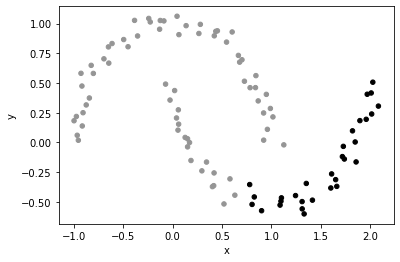

In [67]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns=["x", "y"])
df["color"] = AgglomerativeClustering(n_clusters=2, linkage="ward").fit_predict(df[["x", "y"]])
df.plot.scatter(x="x", y="y", c=df["color"], vmin=-1)

<AxesSubplot:xlabel='x', ylabel='y'>

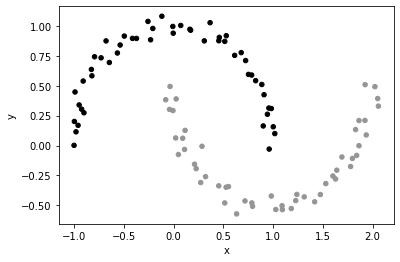

In [68]:
df = pd.DataFrame(make_moons(noise=0.05)[0], columns=["x", "y"])
df["color"] = AgglomerativeClustering(n_clusters=2, linkage="single").fit_predict(df[["x", "y"]])
df.plot.scatter(x="x", y="y", c=df["color"], vmin=-1)